In [1]:
from keras.layers import Input, Lambda, Dense, Flatten
from keras.models import Model
from keras.applications.vgg16 import VGG16
from keras.applications.vgg16 import preprocess_input
from keras.preprocessing import image
from keras.preprocessing.image import ImageDataGenerator
from keras.models import Sequential
import numpy as np
from glob import glob
import matplotlib.pyplot as plt

# re-size all the images to this
IMAGE_SIZE = [224, 224]

Using TensorFlow backend.


In [2]:
train_path = 'Datasets/fruits/train'
valid_path = 'Datasets/fruits/test'

In [4]:
# add preprocessing layer to the front of VGG
vgg = VGG16(input_shape=IMAGE_SIZE + [3], weights='imagenet', include_top=False)

# don't train existing weights
for layer in vgg.layers:
  layer.trainable = False
  

  
  # useful for getting number of classes
folders = glob('Datasets/fruits/train/*')

Instructions for updating:
Colocations handled automatically by placer.


In [5]:
# our layers - you can add more if you want
x = Flatten()(vgg.output)
# x = Dense(1000, activation='relu')(x)
prediction = Dense(len(folders), activation='softmax')(x)

In [6]:
# create a model object
model = Model(inputs=vgg.input, outputs=prediction)

# view the structure of the model
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 224, 224, 3)       0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 224, 224, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 224, 224, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 112, 112, 64)      0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 112, 112, 128)     73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 112, 112, 128)     147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 56, 56, 128)       0         
__________

In [7]:
# tell the model what cost and optimization method to use
model.compile(
  loss='categorical_crossentropy',
  optimizer='adam',
  metrics=['accuracy']
)

In [8]:
from keras.preprocessing.image import ImageDataGenerator

train_datagen = ImageDataGenerator(rescale = 1./255,
                                   shear_range = 0.2,
                                   zoom_range = 0.2,
                                   horizontal_flip = True)

test_datagen = ImageDataGenerator(rescale = 1./255)

training_set = train_datagen.flow_from_directory('Datasets/fruits/train',
                                                 target_size = (224, 224),
                                                 batch_size = 32,
                                                 class_mode = 'categorical')

test_set = test_datagen.flow_from_directory('Datasets/fruits/test',
                                            target_size = (224, 224),
                                            batch_size = 32,
                                            class_mode = 'categorical')

Found 53177 images belonging to 103 classes.
Found 17845 images belonging to 103 classes.


In [9]:
# fit the model
r = model.fit_generator(
  training_set,
  validation_data=test_set,
  epochs=5,
  steps_per_epoch=len(training_set),
  validation_steps=len(test_set)
)

Instructions for updating:
Use tf.cast instead.
Epoch 1/5
1662/1662 [==============================] - 16437s 10s/step - loss: 2.3947 - acc: 0.7983 - val_loss: 2.3990 - val_acc: 0.8115
Epoch 2/5
1662/1662 [==============================] - 16276s 10s/step - loss: 2.3635 - acc: 0.8302 - val_loss: 2.2332 - val_acc: 0.8382
Epoch 3/5
1662/1662 [==============================] - 16290s 10s/step - loss: 2.2079 - acc: 0.8479 - val_loss: 2.2335 - val_acc: 0.8398
Epoch 4/5
1662/1662 [==============================] - 16373s 10s/step - loss: 2.2182 - acc: 0.8508 - val_loss: 2.3530 - val_acc: 0.8277
Epoch 5/5
1662/1662 [==============================] - 16343s 10s/step - loss: 2.2789 - acc: 0.8485 - val_loss: 2.4063 - val_acc: 0.8369


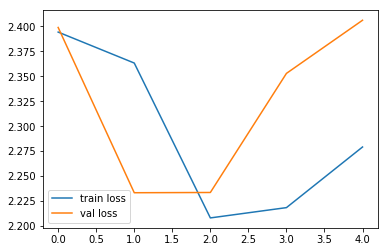

<Figure size 432x288 with 0 Axes>

In [10]:
# loss
plt.plot(r.history['loss'], label='train loss')
plt.plot(r.history['val_loss'], label='val loss')
plt.legend()
plt.show()
plt.savefig('LossVal_loss')

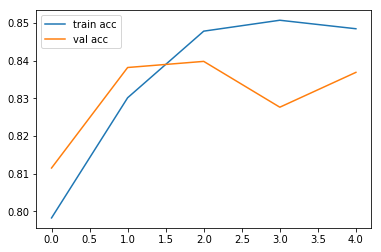

<Figure size 432x288 with 0 Axes>

In [11]:
# accuracies
plt.plot(r.history['acc'], label='train acc')
plt.plot(r.history['val_acc'], label='val acc')
plt.legend()
plt.show()
plt.savefig('AccVal_acc')

In [13]:
import tensorflow as tf

from keras.models import load_model

model.save('model_vgg16_fruits.h5')

In [3]:
#Let's try VGG19
from keras.applications.vgg19 import VGG19
from keras.applications.vgg19 import preprocess_input

In [5]:
# add preprocessing layer to the front of VGG
vgg19 = VGG19(input_shape=IMAGE_SIZE + [3], weights='imagenet', include_top=False)

# don't train existing weights
for layer in vgg19.layers:
  layer.trainable = False
  

  
  # useful for getting number of classes
folders = glob('Datasets/fruits/train/*')

In [6]:
# our layers - you can add more if you want
x = Flatten()(vgg19.output)
# x = Dense(1000, activation='relu')(x)
prediction = Dense(len(folders), activation='softmax')(x)

In [7]:
# create a model object
model2 = Model(inputs=vgg19.input, outputs=prediction)

# view the structure of the model
model2.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_2 (InputLayer)         (None, 224, 224, 3)       0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 224, 224, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 224, 224, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 112, 112, 64)      0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 112, 112, 128)     73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 112, 112, 128)     147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 56, 56, 128)       0         
__________

In [8]:
# tell the model what cost and optimization method to use
model2.compile(
  loss='categorical_crossentropy',
  optimizer='adam',
  metrics=['accuracy']
)

In [9]:
from keras.preprocessing.image import ImageDataGenerator

train_datagen2 = ImageDataGenerator(rescale = 1./255,
                                   shear_range = 0.2,
                                   zoom_range = 0.2,
                                   horizontal_flip = True)

test_datagen2 = ImageDataGenerator(rescale = 1./255)

training_set2 = train_datagen2.flow_from_directory('Datasets/fruits/train',
                                                 target_size = (224, 224),
                                                 batch_size = 32,
                                                 class_mode = 'categorical')

test_set2 = test_datagen2.flow_from_directory('Datasets/fruits/test',
                                            target_size = (224, 224),
                                            batch_size = 32,
                                            class_mode = 'categorical')

Found 53177 images belonging to 103 classes.
Found 17845 images belonging to 103 classes.


In [10]:
# fit the model
r2 = model2.fit_generator(
  training_set2,
  validation_data=test_set2,
  epochs=5,
  steps_per_epoch=len(training_set2),
  validation_steps=len(test_set2)
)

Instructions for updating:
Use tf.cast instead.
Epoch 1/5
1662/1662 [==============================] - 1637s 985ms/step - loss: 4.8704 - acc: 0.6328 - val_loss: 4.9634 - val_acc: 0.6174
Epoch 2/5
1662/1662 [==============================] - 874s 526ms/step - loss: 5.0029 - acc: 0.6642 - val_loss: 5.7127 - val_acc: 0.5883
Epoch 3/5
1662/1662 [==============================] - 873s 525ms/step - loss: 5.6951 - acc: 0.6313 - val_loss: 5.8351 - val_acc: 0.6173
Epoch 4/5
1662/1662 [==============================] - 870s 524ms/step - loss: 6.0171 - acc: 0.6147 - val_loss: 6.1898 - val_acc: 0.5911
Epoch 5/5
1662/1662 [==============================] - 873s 526ms/step - loss: 6.1317 - acc: 0.6103 - val_loss: 6.2514 - val_acc: 0.5905


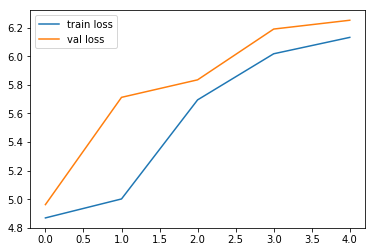

<Figure size 432x288 with 0 Axes>

In [11]:
# loss
plt.plot(r2.history['loss'], label='train loss')
plt.plot(r2.history['val_loss'], label='val loss')
plt.legend()
plt.show()
plt.savefig('LossVal_loss')

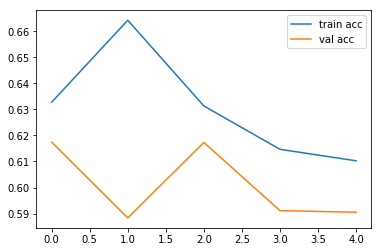

<Figure size 432x288 with 0 Axes>

In [12]:
# accuracies
plt.plot(r2.history['acc'], label='train acc')
plt.plot(r2.history['val_acc'], label='val acc')
plt.legend()
plt.show()
plt.savefig('AccVal_acc')

In [ ]:
#So for this dataset it looks like vgg16 is much more accurate than vgg19

In [13]:
model2.save('model_vgg19.h5')